<a href="https://colab.research.google.com/github/silver919/Machine-Learning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.85 ms (started: 2021-09-15 17:02:43 +00:00)


In [ ]:
# Data: Image

time: 1.83 ms (started: 2021-09-15 17:02:43 +00:00)


In [ ]:
!pip install bing-image-downloader

time: 5.16 s (started: 2021-09-15 17:02:43 +00:00)


In [ ]:
!mkdir images

time: 113 ms (started: 2021-09-15 17:02:48 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=40,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/pretty sunflower


[!!]Indexing page: 1

[%] Indexed 40 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/f1/f7/77/f1f777383859b6d60a04b0dcdf7b08a4.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/5a/70/49/5a70497d32b8d691cb2273b53eb987a8.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i0.wp.com/howlifestyles.com/wp-content/uploads/2020/06/Sunflowers_20200510.jpg?fit=800%2C1000&amp;ssl=1
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/99/85/f2/9985f23566590fd95cf65213d07be239.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/f7/0d/11/f70d11647628b048be42a5b0df480a8b.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/97/76/a4/9776a4956d8f3def3d608ce0eb2c4056.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/originals/75/ad/

In [ ]:
downloader.download("football ball",limit=40,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/football ball


[!!]Indexing page: 1

[%] Indexed 40 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/d0/3c/97/d03c97ba889fdec9f43916ef1580f8e8.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/81/5a/1f/815a1f7add9d6a68af90653e3361450c.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.soccermaster.com/wp-content/uploads/cw4155_adidas_bayern_ball_sm_02.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/b7/74/02/b77402a366753419b354e9eb4c44c443.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.soccerpro.com/wp-content/uploads/2018/01/sc3172_665_nike_mancity_supporters_ball_01.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.soccermaster.com/wp-content/uploads/cw4155_adidas_bayern_ball_sm_05.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://n3.sdlcdn.com/imgs/b/u/m/KIPST

In [ ]:
downloader.download("icecream cone",limit=40,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/icecream cone


[!!]Indexing page: 1

[%] Indexed 40 Images on Page 1.


[%] Downloading Image #1 from https://img1.southernliving.timeinc.net/sites/default/files/styles/4_3_horizontal_-_1200x900/public/image/2017/07/main/ice-cream-cones.jpg?itok=9I9Q7gKA
[%] File Downloaded !

[%] Downloading Image #2 from https://americacomesalive.com/i/Ice_cream_cone_.jpg
[!] Issue getting: https://americacomesalive.com/i/Ice_cream_cone_.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from https://americacomesalive.com/i/ice-cream-cone.jpg
[!] Issue getting: https://americacomesalive.com/i/ice-cream-cone.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from http://graphics8.nytimes.com/images/2013/06/02/magazine/02wmt/02wmt-superJumbo-v3.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.koshericecream.com/wp-content/uploads/magictoolbox_cache/640ca855e591fa5c6759d336b1ca786b/original/2118662499/41404-24-

# Preprocessing the gathered data

In [ ]:
# 1.Resize the image
# 2. Flatten the image

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR='/content/images'
CATEGORIES=['pretty sunflower','football ball','icecream cone']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target=np.array(target)
flat_data=np.array(flat_data)
images=np.array(images)



time: 2min 10s (started: 2021-09-15 17:04:02 +00:00)


## Splitting the data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flat_data,target,test_size=0.3,random_state=100)

time: 119 ms (started: 2021-09-15 17:06:12 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 3min 13s (started: 2021-09-15 17:12:58 +00:00)


In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 0])

time: 265 ms (started: 2021-09-15 17:18:14 +00:00)


In [ ]:
y_test

array([1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0])

time: 4.25 ms (started: 2021-09-15 17:18:28 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 915 µs (started: 2021-09-15 17:19:07 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.75

time: 5.78 ms (started: 2021-09-15 17:19:35 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[13,  0,  0],
       [ 0,  4,  2],
       [ 1,  6, 10]])

time: 9.09 ms (started: 2021-09-15 17:21:29 +00:00)


In [ ]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 42.1 ms (started: 2021-09-15 17:24:19 +00:00)


In [ ]:
model=pickle.load(open('img_model.p','rb'))

time: 87.4 ms (started: 2021-09-15 17:25:48 +00:00)


Enter your URL https://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg
(1024, 681, 3)
Predicted Output: icecream cone


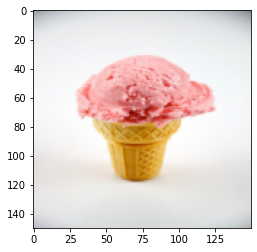

time: 5.86 s (started: 2021-09-15 17:37:38 +00:00)


In [ ]:
# Testing a new image
flat_data=[]
url=input('Enter your URL ')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'Predicted Output: {y_out}')

In [ ]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 8.0 MB 1.2 MB/s 
     |████████████████████████████████| 4.3 MB 42.4 MB/s 
     |████████████████████████████████| 170 kB 64.8 MB/s 
     |████████████████████████████████| 75 kB 4.7 MB/s 
     |████████████████████████████████| 111 kB 71.5 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 124 kB 60.1 MB/s 
     |████████████████████████████████| 787 kB 68.5 MB/s 
     |████████████████████████████████| 370 kB 69.9 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=e1a5dc279d0dcab3d8ff00b043bc7caa1a3b28b7092ff476d1070c94d9660354
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting

     |████████████████████████████████| 745 kB 1.8 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=5022d65fea467091d3aec955b2aba1e212f2194ffa31f89d0114a0bbff048aad
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
time: 22.9 s (started: 2021-09-15 17:40:45 +00:00)


In [ ]:
%%writefile app.py
import streamlit as st
st.title('Image Classifier')

Writing app.py
time: 3.91 ms (started: 2021-09-15 17:50:57 +00:00)


In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


t=2021-09-15T17:55:45+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=45310e5c11949bd2 err="Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\ntn_1yBcTXuC6gqgmCh8ATGZKoHmfse, tn_1yBcTZ7maisenBpDIVUCceDgEHV\n\r\n\r\nERR_NGROK_324\r\n"


PyngrokNgrokHTTPError: ignored

time: 253 ms (started: 2021-09-15 17:55:45 +00:00)
